In [5]:
import os
import json
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

from minima_volume.analysis_funcs import (  grab_folder_names,
                                            load_base_train_size,
                                            list_additional_data,
                                            load_param_num,
                                            multiple_minima_fixed_landscape,
                                            fixed_landscape_minima_labels,
                                            plot_fixed_landscape_minima_pair,
                                            model_volume_across_targets,
                                            append_cutoff_points,
                                            varying_landscape_minima_labels,
                                            plot_minima_volume_vs_data_level,                    
)

problem_name = "MNIST"

loss_value = 0.1  # Loss value to analyze
data_level_log = False #Is the data log distributed?
base_output_dir = "analysis"  # Root folder to save all plots
os.makedirs(base_output_dir, exist_ok=True)

# Data for the loss landscape levels
experiment_folders, data_modifications = grab_folder_names()
data_modifications = ['data_10000']

base_train_size = load_base_train_size(experiment_folders[0])
base_train_size = 10000
model_data_sizes = list_additional_data(experiment_folders[0])
model_data_sizes = [10000]
num_params = load_param_num(experiment_folders[0], data_modifications[0], loss_value = loss_value)

base_shift = 0
if data_modifications[0].startswith("data_"):
    base_shift = base_train_size  # Shift to reflect true dataset size

print("Experiment folders: ", experiment_folders)
print("Different data levels where loss landscapes were computed:", data_modifications)
print("The base train size is: ", base_train_size)
print("Data levels where models were trained: ", model_data_sizes)
print("The number of model parameters is ", num_params)

First entry: Model_0, base_train_size = 1000
Experiment folders:  ['model_40_data_10', 'model_0_data_10', 'model_22_data_10', 'model_32_data_10', 'model_14_data_10', 'model_49_data_10', 'model_9_data_10', 'model_15_data_10', 'model_8_data_10', 'model_48_data_10', 'model_1_data_10', 'model_41_data_10', 'model_33_data_10', 'model_23_data_10', 'model_17_data_10', 'model_38_data_10', 'model_28_data_10', 'model_21_data_10', 'model_31_data_10', 'model_3_data_10', 'model_43_data_10', 'model_30_data_10', 'model_20_data_10', 'model_42_data_10', 'model_2_data_10', 'model_16_data_10', 'model_29_data_10', 'model_39_data_10', 'model_13_data_10', 'model_25_data_10', 'model_35_data_10', 'model_47_data_10', 'model_7_data_10', 'model_34_data_10', 'model_24_data_10', 'model_6_data_10', 'model_46_data_10', 'model_12_data_10', 'model_4_data_10', 'model_44_data_10', 'model_26_data_10', 'model_36_data_10', 'model_19_data_10', 'model_10_data_10', 'model_11_data_10', 'model_45_data_10', 'model_5_data_10', 'mo

In [6]:
# Preparation for the specific plots
import matplotlib as mpl

#cmap = mpl.colormaps.get_cmap("winter")  # blue → green
#background_colors = [cmap(i) for i in np.linspace(0, 1, 10)]

#natural_label = "Minima (On Base Dataset)"
other_label = "Minima (Larger Datasets)"

In [8]:
for data_modification in data_modifications:
    print(f"\nProcessing data modification folder: {data_modification}")

    # Create output folder for this data_modification
    save_dir = os.path.join(base_output_dir, data_modification)
    os.makedirs(save_dir, exist_ok=True)

    # Get axis labels and titles
    labels = fixed_landscape_minima_labels(data_modification, base_train_size)

    # Extract minima landscapes
    all_mdl, all_log_rn, all_test_loss, all_test_acc = multiple_minima_fixed_landscape(
        experiment_folders, data_modification, loss_value #mdl is modification data level
    )
    print(all_mdl)
    print(all_log_rn)
    print(all_test_acc)


Processing data modification folder: data_10000
[[0, 100, 200, 500, 1000, 2000, 5000, 10000], [0, 100, 200, 500, 1000, 2000, 5000, 10000], [0, 100, 200, 500, 1000, 2000, 5000, 10000], [0, 100, 200, 500, 1000, 2000, 5000, 10000], [0, 100, 200, 500, 1000, 2000, 5000, 10000], [0, 100, 200, 500, 1000, 2000, 5000, 10000], [0, 100, 200, 500, 1000, 2000, 5000, 10000], [0, 100, 200, 500, 1000, 2000, 5000, 10000], [0, 100, 200, 500, 1000, 2000, 5000, 10000], [0, 100, 200, 500, 1000, 2000, 5000, 10000], [0, 100, 200, 500, 1000, 2000, 5000, 10000], [0, 100, 200, 500, 1000, 2000, 5000, 10000], [0, 100, 200, 500, 1000, 2000, 5000, 10000], [0, 100, 200, 500, 1000, 2000, 5000, 10000], [0, 100, 200, 500, 1000, 2000, 5000, 10000], [0, 100, 200, 500, 1000, 2000, 5000, 10000], [0, 100, 200, 500, 1000, 2000, 5000, 10000], [0, 100, 200, 500, 1000, 2000, 5000, 10000], [0, 100, 200, 500, 1000, 2000, 5000, 10000], [0, 100, 200, 500, 1000, 2000, 5000, 10000], [0, 100, 200, 500, 1000, 2000, 5000, 10000], [0, 1

In [9]:
all_log_rn_list = [sublist[-1] for sublist in all_log_rn]#[val for sublist in all_log_rn for val in sublist]
all_test_acc_list = [sublist[-1] for sublist in all_test_acc]#[val for sublist in all_test_acc for val in sublist]

print(all_log_rn_list)
print(all_test_acc_list)

[575206.7296509764, 574616.7874278636, 595655.8709752413, 621325.398981168, 584293.9060187534, 543281.3296838304, 559272.1407705602, 568602.8672678053, 637103.5246839316, 565304.2372917135, 577475.856572424, 592693.973694082, 577762.8148663214, 556530.90838296, 568602.8672678053, 568571.147689972, 592957.6208556562, 596112.037973939, 626418.8439757901, 615804.0400433037, 509783.0915551799, 556149.4350769995, 548962.1582845631, 589489.2023818335, 645954.2617571262, 578317.1060809435, 562829.9100877822, 615853.6476248939, 577209.053819236, 590233.3114272229, 516318.22764945106, 568408.4861861861, 562055.0652173539, 564913.1377484141, 586618.8258878831, 571552.9850610443, 592725.6932719152, 550159.6480208763, 615537.5419350705, 604338.4314322661, 590299.7160653142, 595337.1931035108, 601174.0767490901, 533730.4027223955, 624323.583748688, 536279.1900596498, 607285.7892355782, 586833.8793991901, 595788.5938590594, 584280.1686455325]
[0.9485999941825867, 0.9496999979019165, 0.95010000467300

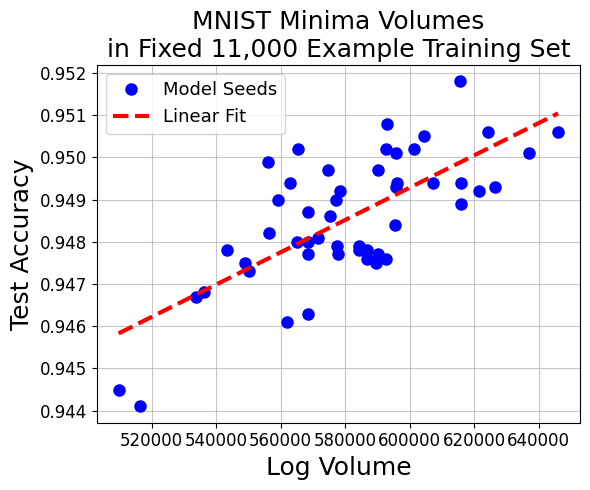

In [11]:
from minima_volume.volume_funcs import plot_pair_metrics


plot_pair_metrics(
    # metric1_values=all_test_loss_list,
    metric1_values=all_log_rn_list,
    metric2_values=all_test_acc_list,
    # metric2_values=all_log_rn_list,
    # xlabel="Test Loss",
    xlabel="Log Volume",
    ylabel="Test Accuracy",
    # ylabel="Log Volume",
    title="MNIST Minima Volumes\nin Fixed 11,000 Example Training Set",
    display=True,
    connect_dots=False,
    label='Model Seeds',
    show_best_fit=True,
    xlabel_size=18, ylabel_size=18, title_size=18, legend_size = 13,
    alpha=0.7
)